In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import scipy.optimize as opt
from tqdm import tqdm
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [4]:
filename = 'pareto_sm_cleaned.csv'  
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/'+filename)

df_full = pd.read_csv('SMBH_Data_03_07_24.csv',header=1)

paras = ['M*_sph','M*_gal','R_e_sph_maj','log_R_e_sph_maj','R_e_sph_eq_kpc','log_R_e_sph_eq_kpc',
        'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi', 'logRemajphi', 'logReeqphi']

In [5]:
filename = 'pareto_sm_cleaned.csv'
t_eq = pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/'+filename[:-12]+'_refit.csv')
df_full = pd.read_csv('SMBH_Data_03_07_24.csv',header=1)
paras = ['M*_sph','M*_gal','R_e_sph_maj','log_R_e_sph_maj','R_e_sph_eq_kpc','log_R_e_sph_eq_kpc',
        'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi', 'logRemajphi', 'logReeqphi']
paras.append('M_BH')
paras.append('M_BH_std_sym')
df=df_full[paras]
df=df.dropna()
len(df)

122

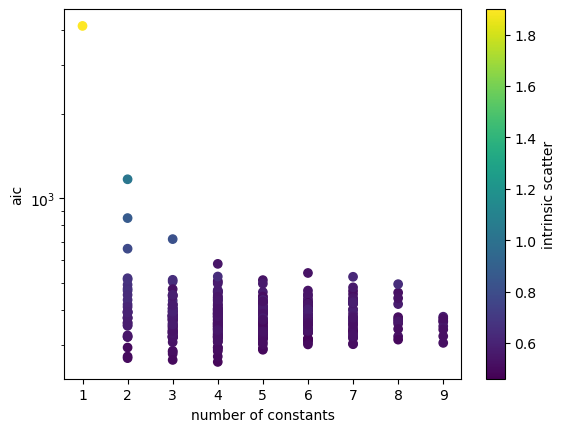

In [6]:
aic = -2*t_eq['LLL']+2*(t_eq['number_constants']+1)
t_eq['AIC']=aic
plt.scatter(t_eq['number_constants']+1,aic,c=t_eq['intrinsic_scatter'])
plt.xlabel('number of constants')
plt.ylabel('aic')
#plt.ylim(0,1000)
plt.yscale('log')
plt.colorbar().set_label('intrinsic scatter')

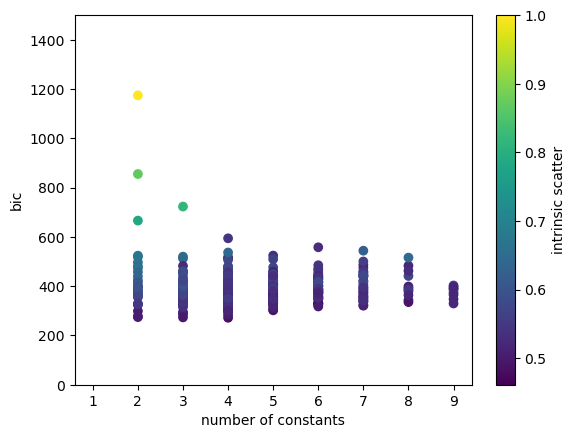

In [11]:
bic = -2*t_eq['LLL']+np.log(len(df))*(t_eq['number_constants']+1)
t_eq['BIC']=bic
plt.scatter(t_eq['number_constants']+1,bic,c=np.clip(t_eq['intrinsic_scatter'],0,1.0))
plt.xlabel('number of constants')
plt.ylabel('bic')
plt.ylim(0,1500)
#plt.yscale('log')
plt.colorbar().set_label('intrinsic scatter')

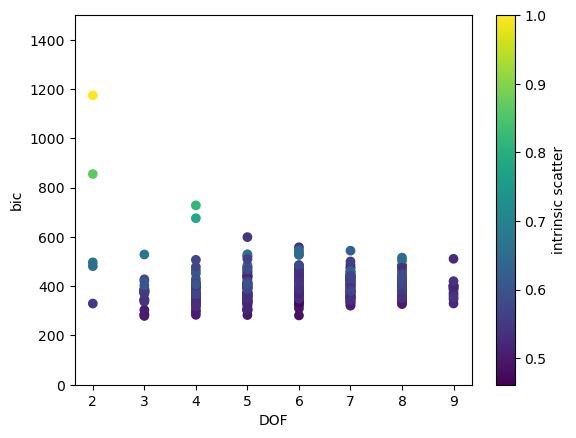

In [13]:
dof = np.maximum(t_eq['number_constants'],t_eq['unique_number_variables'])+1
bic = np.array(-2*t_eq['LLL']+np.log(len(df))*dof)
t_eq['BIC']=bic
t_eq['DOF']=dof
plt.scatter(dof,bic,c=np.clip(t_eq['intrinsic_scatter'],0,1.0))
plt.xlabel('DOF')
plt.ylabel('bic')
plt.ylim(0,1500)
#plt.yscale('log')
plt.colorbar().set_label('intrinsic scatter')

In [14]:
#aic.argmin()

In [15]:
bic.argsort(),bic[bic.argsort()]

(array([254, 180, 173, 388, 201, 158,   2,   9, 168,  70, 142, 170, 404,
         99,  64, 200, 390, 249, 374,  66, 119, 105, 372, 331, 169, 145,
        251, 405, 330, 162, 117, 278, 373, 243, 250, 293,  53, 198, 371,
        199, 233, 301,  26, 206, 197, 284, 118, 108, 190, 274, 115,   4,
        369,  36,  90, 347,  47, 241, 120, 125, 183, 407, 289,   3, 304,
        140,  37, 303,  35, 279,  89,  63, 370, 367, 358, 246, 299, 357,
        139, 298, 114, 231, 191, 395, 351, 297, 225, 113, 133, 122, 220,
         67, 329, 398,  98, 384, 396, 130,  85,  54, 152,  91, 217,  34,
        300,  40,  50, 109, 123,  42,  72, 292,   8, 209, 134, 172, 213,
        102,  86, 240,  48, 147, 239, 287, 364, 257,  62, 188, 193,  84,
         45, 207, 222, 121, 340, 379, 192, 321, 348, 338, 391,  25, 322,
        189, 397, 248, 181, 236, 104, 323, 110, 344, 378,  83, 261, 131,
        215, 179,  43, 262, 294, 363, 362,  33, 182, 151, 141, 334, 361,
         44, 127, 143, 129, 337, 258, 235, 126,  21

In [17]:
def view_equation(index,var_list=paras,t_eq=t_eq):
    print('equation:',parse_expr(t_eq.iloc[index]['refit_equation']))
    display(parse_expr(t_eq.iloc[index]['refit_equation']))
    unique_variables = list(dict.fromkeys(re.findall(r'\bx\d+',t_eq.iloc[index]['refit_equation'])))
    #print(unique_variables)
    for i in range(len(unique_variables)):
        print(unique_variables[i],':',var_list[int(unique_variables[i][1:])])
    
    print('intrinsic scatter:',t_eq.iloc[index]['intrinsic_scatter'])
    print('wrmse:',t_eq.iloc[index]['refit_wrmse'])
    print('AIC:',t_eq.iloc[index]['AIC'])
    print('BIC:',t_eq.iloc[index]['BIC'])
    print('DOF:',t_eq.iloc[index]['DOF'])
    return None

In [18]:
print('Top1: index',bic.argsort()[0])
view_equation(bic.argsort()[0])

Top1: index 254
equation: 1.8013079950270354*x0 - x1


1.8013079950270354*x0 - x1

x0 : M*_sph
x1 : M*_gal
intrinsic scatter: 0.504820071397402
wrmse: 0.247010925463637
AIC: 268.6500189338
BIC: 279.06208206799977
DOF: 3


In [19]:
print('Top2: index',bic.argsort()[1])
view_equation(bic.argsort()[1])

Top2: index 180
equation: x0**2.0429120347471823/(x11 + 3.9847406705974793) - x10 - 0.01023312200976323/(-x7 + x9 + 0.21416281491177552)


x0**2.0429120347471823/(x11 + 3.9847406705974793) - x10 - 0.01023312200976323/(-x7 + x9 + 0.21416281491177552)

x0 : M*_sph
x11 : logRhphi
x10 : logRh
x7 : logR10
x9 : Rh
intrinsic scatter: 0.4838640600188678
wrmse: 0.1619535747452919
AIC: 260.41016850933005
BIC: 281.2342947777296
DOF: 6


In [21]:
view_equation(bic.argsort()[3])

equation: 1.4448154476230652*x0 - 1.4448154476230652*x10 - 1.4448154476230652*x7/x9 - 5.886071716930659


1.4448154476230652*x0 - 1.4448154476230652*x10 - 1.4448154476230652*x7/x9 - 5.886071716930659

x0 : M*_sph
x10 : logRh
x7 : logR10
x9 : Rh
intrinsic scatter: 0.4985967110583826
wrmse: 0.1897198422290337
AIC: 264.72983426307263
BIC: 282.7499394867389
DOF: 5


In [29]:
# [rank]^th best (in terms of [criteria]) with dof = [ndof]
ndof = 3
rank = 0
criteria = 'BIC'
t_eq_dof=t_eq[t_eq['DOF']==ndof]
view_equation(np.array(t_eq_dof[criteria]).argsort()[rank],t_eq=t_eq_dof)

equation: 1.8013079950270354*x0 - x1


1.8013079950270354*x0 - x1

x0 : M*_sph
x1 : M*_gal
intrinsic scatter: 0.504820071397402
wrmse: 0.247010925463637
AIC: 268.6500189338
BIC: 279.06208206799977
DOF: 3


In [42]:
# [rank]^th best (in terms of [criteria]) with number of variables = [nvar]
nvar = 6
rank = 0
criteria = 'BIC'
t_eq_var=t_eq[t_eq['unique_number_variables']==nvar]
view_equation(np.array(t_eq_var[criteria]).argsort()[rank],t_eq=t_eq_var)

equation: x0 - x10*(x9 + 28.8356014219019)/(2.784753617324423*x12 + x6/x10) + 0.49451404299167934*x3 - 2.3295451366035675


x0 - x10*(x9 + 28.8356014219019)/(2.784753617324423*x12 + x6/x10) + 0.49451404299167934*x3 - 2.3295451366035675

x0 : M*_sph
x10 : logRh
x9 : Rh
x12 : logRemajphi
x6 : R10
x3 : log_R_e_sph_maj
intrinsic scatter: 0.5021380485479493
wrmse: 0.1505199825184739
AIC: 311.29865800647985
BIC: 332.92680531961264
DOF: 7


In [65]:
# [rank]^th best (in terms of [criteria]) with number of variables = [nvar]
nvar = 1
rank = 0
criteria = 'intrinsic_scatter'
t_eq_var=t_eq[t_eq['unique_number_variables']==nvar]
view_equation(np.array(t_eq_var[criteria]).argsort()[rank],t_eq=t_eq_var)

equation: 0.035539133912710325*x0**2.141884231745458 + 2.4807480231071706


0.035539133912710325*x0**2.141884231745458 + 2.4807480231071706

x0 : M*_sph
intrinsic scatter: 0.537137960945818
wrmse: 0.2601733410032109
AIC: 328.680520710628
BIC: 337.0925838448278
DOF: 3


In [64]:
# [rank]^th best (in terms of [criteria]) with number of variables = [nvar]
nvar = 1
rank = 6
criteria = 'refit_wrmse'
t_eq_var=t_eq[t_eq['unique_number_variables']==nvar]
view_equation(np.array(t_eq_var[criteria]).argsort()[rank],t_eq=t_eq_var)

equation: 0.8279516003707177*x8


0.8279516003707177*x8

x8 : logR10phi
intrinsic scatter: 0.8676912970600307
wrmse: 0.8026008174630399
AIC: 849.474394599194
BIC: 855.0824366886606
DOF: 2


In [74]:
# [rank]^th best (in terms of [criteria]) with PySR complexity = [complexity]
complexity = 5
rank = 4
criteria = 'intrinsic_scatter'
t_eq_var=t_eq[t_eq['complexity']==complexity]
view_equation(np.array(t_eq_var[criteria]).argsort()[rank],t_eq=t_eq_var)

equation: 1.6886931341335003*x0 - x8


1.6886931341335003*x0 - x8

x0 : M*_sph
x8 : logR10phi
intrinsic scatter: 0.6010811233406936
wrmse: 0.2383521273974511
AIC: 392.7241486483156
BIC: 403.1362117825154
DOF: 3


In [128]:
# [rank]^th best (in terms of [criteria]) with PySR complexity = [complexity]
complexity = 5
rank = 0
criteria = 'refit_wrmse'
t_eq_var=t_eq[t_eq['complexity']==complexity]
view_equation(np.array(t_eq_var[criteria]).argsort()[rank],t_eq=t_eq_var)

equation: 1.6886931341335003*x0 - x8


1.6886931341335003*x0 - x8

x0 : M*_sph
x8 : logR10phi
intrinsic scatter: 0.6010811233406936
wrmse: 0.2383521273974511
AIC: 392.7241486483156
BIC: 403.1362117825154
DOF: 3


In [109]:
t_eq.columns

Index(['complexity', 'loss', 'score', 'equation', 'sympy_format',
       'lambda_format', 'number_constants', 'variables', 'number_variables',
       'unique_number_variables', 'evolutions', 'iterations', 'fitting_format',
       'num_fitting_variables', 'initial_constant_guess', 'LLL',
       'intrinsic_scatter', 'refit_equation', 'refit_wrmse', 'AIC', 'BIC',
       'DOF'],
      dtype='object')

(0.0, 0.5)

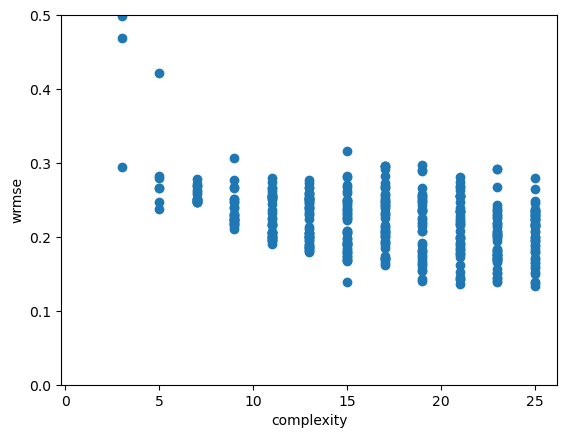

In [111]:
plt.scatter(t_eq['complexity'],t_eq['refit_wrmse'])
plt.xlabel('complexity')
plt.ylabel('wrmse')
#plt.yscale('log')
plt.ylim(0,0.5)

Text(0, 0.5, 'wrmse')

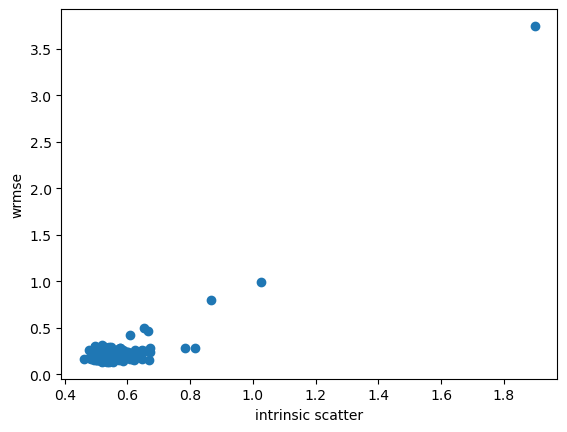

In [127]:
plt.scatter(t_eq['intrinsic_scatter'],t_eq['refit_wrmse'])
plt.xlabel('intrinsic scatter')
plt.ylabel('wrmse')
#plt.yscale('log')
#plt.xscale('log')

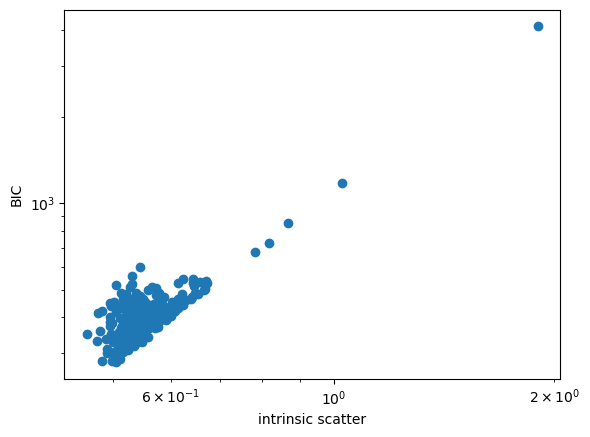

In [86]:
plt.scatter(t_eq['intrinsic_scatter'],t_eq['BIC'])
plt.xlabel('intrinsic scatter')
plt.ylabel('BIC')
plt.yscale('log')
plt.xscale('log')

Text(0, 0.5, 'LLL')

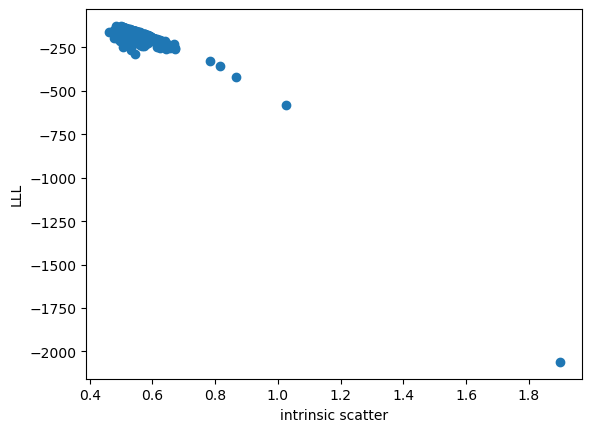

In [87]:
plt.scatter(t_eq['intrinsic_scatter'],t_eq['LLL'])
plt.xlabel('intrinsic scatter')
plt.ylabel('LLL')
#plt.ylim(-2000,500)
#plt.yscale('log')
#plt.xscale('log')

In [102]:
t_eq

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,...,fitting_format,num_fitting_variables,initial_constant_guess,LLL,intrinsic_scatter,refit_equation,refit_wrmse,AIC,BIC,DOF
0,1,4.859613,0.000000,x61,x61,PySRFunction(X=>x61),0,{'x61'},1,1,...,x61,0,[],-2347.116381,2.350859,x61,4.859613,4696.232762,4703.297961,2
1,11,0.112913,0.043123,(x12 - ((2.361378533548963 - ((x61 / x45) - 0....,x12 - x73 - 2.483870364573009 + x61/x45,PySRFunction(X=>x12 - x73 - 2.483870364573009 ...,2,"{'x45', 'x61', 'x73', 'x12'}",4,4,...,x12 - x73 - p[0] + x61/x45,1,['2.483870364573009'],-64.331031,0.411608,x12 - x73 - 2.5199345247679643 + x61/x45,0.117759,134.662062,151.325060,5
2,13,0.110034,0.012911,(x12 - (((2.361378533548963 - (x61 / (x45 - -0...,x12 + x61/(x45 + 0.7819512493710871) - x73 - 2...,PySRFunction(X=>x12 + x61/(x45 + 0.78195124937...,3,"{'x45', 'x61', 'x73', 'x12'}",4,4,...,x12 + x61/(x45 + p[0]) - x73 - p[1],2,"['0.7819512493710871', '2.43920200603072']",-66.129456,0.406334,x12 + x61/(x45 + 18.606264277535573) - x73 - 2...,0.116794,140.258913,154.921910,5
3,15,0.107942,0.009601,(x12 - ((2.361378533548963 - ((x61 / ((x42 + x...,x12 + x42*x61/(x42 + x45) - x73 - 2.4838703645...,PySRFunction(X=>x12 + x42*x61/(x42 + x45) - x7...,2,"{'x45', 'x73', 'x42', 'x61', 'x12'}",6,5,...,x12 + x42*x61/(x42 + x45) - x73 - p[0],1,['2.483870364573009'],-69.424639,0.422253,x12 + x42*x61/(x42 + x45) - x73 - 2.5482637022...,0.115585,144.849278,166.044875,6
4,17,0.098634,0.045086,(x12 - (2.361378533548963 - (((0.4883772896702...,x12 - 2.5585015935188197 + 0.75912583848231723...,PySRFunction(X=>x12 - 2.5585015935188197 + 0.7...,5,"{'x42', 'x26', 'x12'}",4,3,...,x12 - p[1] + p[0]/(-p[2]*x26 + x42**p[3]),4,"['0.75912583848231723', '2.5585015935188197', ...",-71.223606,0.388499,x12 - 8.305987918888377 + 6.471540252154669/(-...,0.076278,154.447212,169.642809,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,9,0.028624,0.232517,((x15 * 3.4911837061982536) - ((x42 - x39) / x...,3.4911837061982536*x15 - (-x39 + x42)/x15,PySRFunction(X=>3.4911837061982536*x15 - (-x39...,1,"{'x39', 'x42', 'x15'}",4,3,...,p[0]*x15 - (-x39 + x42)/x15,1,['3.4911837061982536'],-17.467558,0.237938,3.4669912651093515*x15 - (-x39 + x42)/x15,0.029744,38.935116,53.065514,4
459,11,0.023165,0.105798,((x15 * 3.4911837061982536) - ((x42 - x39) / (...,3.4911837061982536*x15 - (-x39 + x42)/(-x4 + x51),PySRFunction(X=>3.4911837061982536*x15 - (-x39...,1,"{'x51', 'x15', 'x4', 'x42', 'x39'}",5,5,...,p[0]*x15 - (-x39 + x42)/(-x4 + x51),1,['3.4911837061982536'],-16.414527,0.226667,3.4641113875288614*x15 - (-x39 + x42)/(-x4 + x51),0.024899,36.829053,60.024650,6
460,7,0.041813,0.245612,((x15 * 3.9938613107087564) - (x42 / x39)),3.9938613107087564*x15 - x42/x39,PySRFunction(X=>3.9938613107087564*x15 - x42/x39),1,"{'x39', 'x42', 'x15'}",3,3,...,p[0]*x15 - x42/x39,1,['3.9938613107087564'],-33.971663,0.302410,3.960210442572034*x15 - x42/x39,0.047531,71.943326,86.073724,4
461,11,0.022001,0.131577,((x15 * 3.4911837061982536) - ((x42 - x39) / (...,3.4911837061982536*x15 - 1.7676790306349228*(-...,PySRFunction(X=>3.4911837061982536*x15 - 1.767...,2,"{'x39', 'x42', 'x15'}",4,3,...,p[0]*x15 - p[1]*(-x39 + x42)/x39,2,"['3.4911837061982536', '1.7676790306349228']",-14.338347,0.198048,3.4309330840887045*x15 - 2.0213603541396035*(-...,0.019673,34.676695,46.807093,4
